<a href="https://colab.research.google.com/github/Bomitech02/Python/blob/main/Data%20science/Naukri_data/Naukri_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1qGfRs0P1JHsAXK_l7gboWuj0hgzKaDBa'}) # replace the id with id of file you want to access
downloaded.GetContentFile('naukri.csv')

#For basic operations
import pandas as pd
import numpy as np

#For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('naukri.csv')
data.shape


(22000, 14)

In [ ]:
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [ ]:
#Clean the location address by splitting and extracting the first 5 locations
data['joblocation_address'] = data['joblocation_address'].str.split(',')
data['joblocation_address'].iloc[:5]

0                                            [Chennai]
1                                            [Chennai]
2                                          [Bengaluru]
3    [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                          [Bengaluru]
Name: joblocation_address, dtype: object

In [ ]:
data = data.explode('joblocation_address')
pd.set_option('max_rows', 30000)
data['joblocation_address'].value_counts()[:20]

Bengaluru/Bangalore           3775
Mumbai                        2593
Bengaluru/Bangalore           2134
Bengaluru                     2026
 Mumbai                       1378
Chennai                       1290
Hyderabad / Secunderabad      1246
Hyderabad                     1154
Mumbai                        1067
 Mumbai                        923
 Chennai                       905
Delhi                          790
Noida                          777
Gurgaon                        762
 Chennai                       738
 Hyderabad / Secunderabad      700
Delhi                          680
 Pune                          645
 Delhi                         602
 Gurgaon                       557
Name: joblocation_address, dtype: int64

In [ ]:
#Cleaning what I can due to insuffucient time
data['joblocation_address'] = data['joblocation_address'].replace(('Bengaluru/Bangalore','Bengaluru/Bangalore ',' Mumbai',' Mumbai ',' Chennai ','Chennai ',' Hyderabad / Secunderabad ',' Pune', ' Delhi', ' Gurgaon', ' Hyderabad'),('Bangalore','Bangalore','Mumbai','Mumbai','Chennai','Chennai','Secunderabad', 'Pune', 'Delhi', 'Gurgaon', 'Hyderabad'))
data['joblocation_address'].value_counts()[:20]

Bangalore                    5909
Mumbai                       4894
Chennai                      2631
Bengaluru                    2026
Hyderabad                    1710
Delhi                        1392
Gurgaon                      1319
Hyderabad / Secunderabad     1246
Mumbai                       1067
Noida                         777
 Chennai                      738
Secunderabad                  700
Pune                          695
Delhi                         680
Noida                         490
 Pune                         486
 Hyderabad / Secunderabad     444
 Bengaluru/Bangalore          425
 Bengaluru                    415
 Delhi                        393
Name: joblocation_address, dtype: int64

In [ ]:
#Remove the cities with less than 25 opennings
counts = data['joblocation_address'].value_counts()
data = data.loc[data['joblocation_address'].isin(counts.index [counts > 25])]
display(data['joblocation_address'].value_counts())

Bangalore                               5909
Mumbai                                  4894
Chennai                                 2631
Bengaluru                               2026
Hyderabad                               1710
Delhi                                   1392
Gurgaon                                 1319
Hyderabad / Secunderabad                1246
Mumbai                                  1067
Noida                                    777
 Chennai                                 738
Secunderabad                             700
Pune                                     695
Delhi                                    680
Noida                                    490
 Pune                                    486
 Hyderabad / Secunderabad                444
 Bengaluru/Bangalore                     425
 Bengaluru                               415
 Delhi                                   393
Delhi/NCR(National Capital Region)       388
Delhi/NCR(National Capital Region)       383
 Bengaluru

In [ ]:
#Clean the experience records
data['experience'][:6]

0      0 - 1 yrs
1      0 - 0 yrs
2      4 - 8 yrs
3    11 - 15 yrs
3    11 - 15 yrs
3    11 - 15 yrs
Name: experience, dtype: object

In [ ]:
pd.set_option('max_rows', 40000)

In [ ]:
data['experience'] = data['experience'].str.split(" ")
data['min experience'] = data['experience'].apply(lambda x: x[0])
data['max experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])
data['min experience'].value_counts()



2      7160
0      6221
3      5263
1      4393
5      3287
4      3095
6      1518
10     1412
8      1276
7      1035
9       484
12      308
15      277
Not     111
11       75
13       73
14       61
20       26
18       25
16       16
17        6
23        1
25        1
26        1
Name: min experience, dtype: int64

In [ ]:
#Cleaning the missing values in min/max experience
data['min experience'] = data['min experience'].replace(('Not'), (0))
data['max experience'] = data['max experience'].replace(('Mentioned', '-1'), (5, 5))
data['max experience'].value_counts()

5     6326
7     4410
8     3695
6     3233
3     3174
10    2822
4     2633
9     1789
2     1569
12    1075
11    1053
1     1046
15     828
13     672
20     489
0      351
14     250
18     131
5      112
16     108
17      92
25      83
22      80
19      27
23      26
24      18
21      12
30      11
28       8
27       1
26       1
Name: max experience, dtype: int64

In [ ]:
#Converting  the yrs of experience to int.
data['min experience'] = data['min experience'].astype('int')
data['max experience'] = data['max experience'].astype('int')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

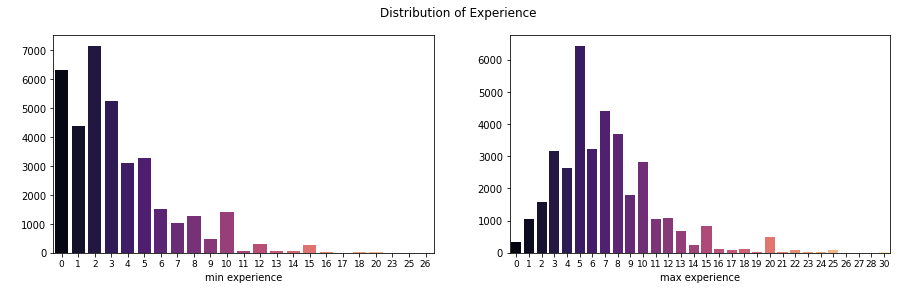

In [ ]:
#Checking for data distribution/spread]
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.countplot(data['min experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.subplot(1, 2, 2)
sns.countplot(data['max experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.suptitle('Distribution of Experience')
plt.show

In [ ]:
data['education'][:5]

0    UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1    UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2    UG: Any Graduate - Any Specialization PG:Any P...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
Name: education, dtype: object

In [ ]:
data['education'].isnull().sum()

3076

In [ ]:
#Replace the missing education with the most common data
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization')
data['education'].isnull().sum()

0

In [ ]:
data['education'] = data['education'].str.split(' ')
data['education'] = data['education'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['education'].value_counts(dropna = False)

Any                    23794
B.Tech/B.E.             8730
B.Com                    636
B.Sc                     525
Diploma                  424
Graduation               396
B.B.A                    260
B.A                      238
BCA                      172
MBBS                     151
BDS                      109
B.Pharma                  97
Other                     86
B.Ed                      80
LLB                       70
Not                       54
-                         53
BHM                       53
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              23
B.Sc,                     21
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
Diploma,                   5
B.Com,                     5
BCA,                       3
BVSC                       3
B.A,                       3
B.B.A,                     2
MBA/PGDM                   2
PG:Other                   1
B.Des.        

In [ ]:
data['education'] = data['education'].replace(('B.Tech/B.E.','Graduation','Other','Not','-','B.Tech/B.E.,','B.Sc,','PG:CA','Doctorate:Doctorate','B.Pharma,','Diploma,','B.Com,','BCA,','B.A,','B.B.A,','PG:Other'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Sc','CA','Doctorate','B.Pharma','Diploma','B.Com','BCA','B.A','B.B.A','B.Tech'))
data['education'].value_counts()

Any             23794
B.Tech           9343
B.Com             641
B.Sc              546
Diploma           429
B.B.A             262
B.A               241
BCA               175
MBBS              151
BDS               109
B.Pharma          104
B.Ed               80
LLB                70
Doctorate          58
BHM                53
B.Arch             37
Postgraduate       14
CA                 10
BVSC                3
MBA/PGDM            2
BAMS                1
B.Des.              1
BFA                 1
Name: education, dtype: int64

In [ ]:
data['industry'][:10]

0            Media / Entertainment / Internet
1    Advertising / PR / MR / Event Management
2             IT-Software / Software Services
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
4             IT-Software / Software Services
5             IT-Software / Software Services
Name: industry, dtype: object

In [ ]:
data['industry'].isnull().sum()

1

In [ ]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])
data['industry'].isnull().sum()

0

In [ ]:
data['industry'].str.split('/')[:10]

0             [Media ,  Entertainment ,  Internet]
1    [Advertising ,  PR ,  MR ,  Event Management]
2               [IT-Software ,  Software Services]
3       [Banking ,  Financial Services ,  Broking]
3       [Banking ,  Financial Services ,  Broking]
3       [Banking ,  Financial Services ,  Broking]
3       [Banking ,  Financial Services ,  Broking]
3       [Banking ,  Financial Services ,  Broking]
4               [IT-Software ,  Software Services]
5               [IT-Software ,  Software Services]
Name: industry, dtype: object

In [ ]:
#Split the words in the industry col and extract only the first
#This time, I am saving the newly formatted data alongside the initial data
data['Industry'] = data['industry'].str.split('/')
data['Industry'] = data['Industry'].apply(lambda x: x[0])
data['Industry'].value_counts()

IT-Software                 14528
BPO                          2282
Banking                      2056
Education                    1696
Recruitment                  1517
Automobile                   1144
Internet                     1018
Pharma                        988
Construction                  932
Medical                       861
Travel                        723
Industrial Products           599
Other                         540
Accounting                    539
Strategy                      518
Advertising                   462
IT-Hardware & Networking      438
Telecom                       428
Media                         425
FMCG                          415
Insurance                     378
Retail                        362
Oil and Gas                   338
Real Estate                   297
Consumer Electronics          265
Semiconductors                248
Electricals                   234
Textiles                      193
Courier                       179
KPO           

In [ ]:
data['skills'].head(10)

0                                     ITES
1                                Marketing
2    IT Software - Application Programming
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
4    IT Software - Application Programming
5    IT Software - Application Programming
Name: skills, dtype: object

In [ ]:
data['skills'].isnull().sum()

791

In [ ]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum()

0

In [ ]:
data['Skills'] = data['skills'].str.split(' - ')
data['Skills'] = data['Skills'].apply(lambda x: x[1] if len(x)> 1 else x [0])
data['Skills'].value_counts()

In [ ]:
data.isnull().sum()

company                    0
education                  0
experience                 0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      27381
payrate                   93
postdate                  26
site_name              30725
skills                     0
uniq_id                    0
min experience             0
max experience             0
Industry                   0
Skills                     0
dtype: int64

In [ ]:
#Update the missing values in noofpositions
data['numberofpositions'] = data['numberofpositions'].fillna(1)
data['numberofpositions'] = data['numberofpositions'].astype('int')
data['numberofpositions'].isnull().sum()

0

In [ ]:
#Update the site_name using the mode function
data['site_name'] = data['site_name'].fillna(data['site_name'].mode()[0])
data['site_name'].value_counts(dropna = False)

www.naukri.com    36125
Name: site_name, dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

company                0
education              0
experience             0
industry               0
jobdescription         0
jobid                  0
joblocation_address    0
jobtitle               0
numberofpositions      0
payrate                0
postdate               0
site_name              0
skills                 0
uniq_id                0
min experience         0
max experience         0
Industry               0
Skills                 0
dtype: int64